<header style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</header>

<h1>Lecture 01: Introduction</h1>

<h2>Spring 2022 Instructors and Teaching Assistants</h2>



<ul>
    <li>Instructors</li>
        <ul>
            <li>Craig Persiko - CRN: 34246</li>
            <li>Shawn Wiggins - CRNs: 34244, 34245</li>
        </ul>
    <li>Teaching Assistants</li>
        <ul>
            <li>Jesús Flores Sanchez - CRN: 34244</li>
            <li>Mischa Skeeter - CRNs: 34245, 34246</li>
        </ul>
</ul>

<h2>What is Data Science?</h2>

Learning about the world from data using computation:
<ul>
    <li>Exploration</li>
        <ul>
            <li>Identifying patterns in data</li>
            <li>Uses visualizations</li>
        </ul>
    <li>Inference</li>
        <ul>
            <li>Using data to draw reliable conclusions about the world</li>
            <li>Uses statistics</li>
        </ul>
    <li>Prediction</li>
        <ul>
            <li>Making informed guesses about unobserved data</li>
            <li>Uses machine learning</li>
        </ul>
</ul>

<h2>Course Syllabus</h2>

<a href="https://ccsf.instructure.com">https://ccsf.instructure.com/</a>

<h2>Example Analysis</h2>

The following code contains that I'll use to run this example. You don't have to understand how this works or change it for now.


In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

<h3>Python "Reads" Two Books</h3>

In [2]:
huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

<h3>Adventures of Huckleberry Finn</h3>

In [3]:
huck_finn_chapters[0][:100]

"I. YOU don't know about me without you have read a book by the name of The Adventures of Tom Sawyer;"

In [4]:
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


Count the number of times "Tom" and "Jim" appear in the text.

In [5]:
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [6]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

Create a table called `counts` that organizes the number of times the names Jim, Tom, and Huck appear in each chapter.

In [7]:
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


Visualize the counts.

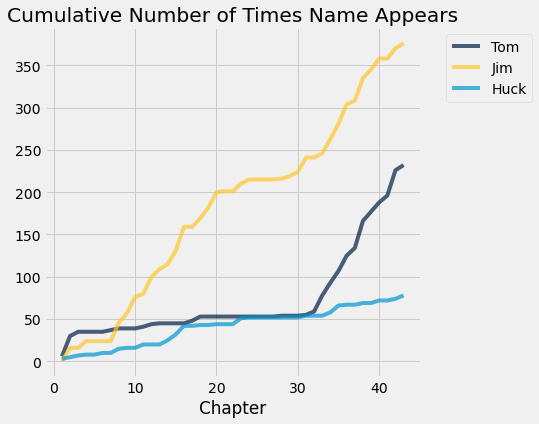

In [8]:
cumulative_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cumulative_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

<h3>Little Women</h3>

<h4>List the Chapters of Little Women</h4>

In [9]:
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


Count the names in the chapters of Little Women.

In [10]:
people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}

counts = Table().with_columns([
        'Amy', people_counts['Amy'],
        'Beth', people_counts['Beth'],
        'Jo', people_counts['Jo'],
        'Laurie', people_counts['Laurie'],
        'Meg', people_counts['Meg']
    ])
counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
13,12,21,0,20
2,2,62,16,36
14,18,34,0,17
6,14,55,35,13
6,28,13,9,5
27,5,9,7,5
48,9,71,17,16
3,5,21,24,71
5,5,12,4,4


Plot the cumulative counts.

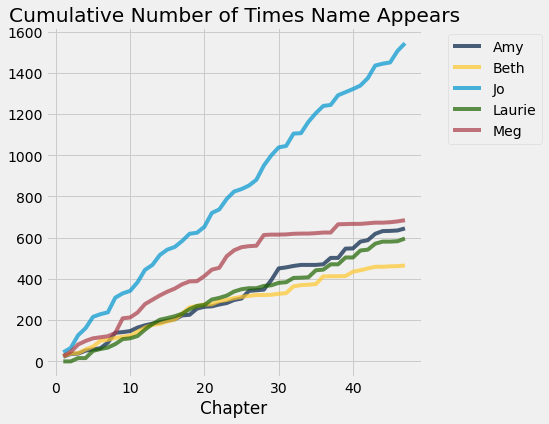

In [11]:
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

In each chapter, count the number of all characters call this the "length" of the chapter" Also, count the number periods in each chapter.

In [12]:
chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

The counts for Huckleberry Finn

In [13]:
chars_periods_hf

HF Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


The counts for Little Women

In [14]:
chars_periods_lw

LW Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


Visualize the relationship betwen the length of a chapter and the number of periods in a chapter.

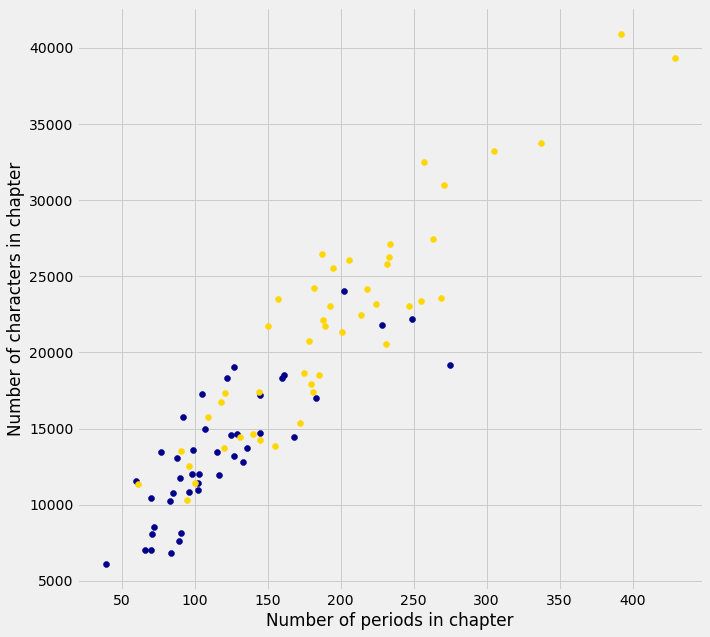

In [15]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

<footer>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>